## Linear + TanH + Linear + Sigmoid

In [2]:
import sys
sys.path.insert(0, '..')

In [9]:
from activation import TanH, Sigmoid
from enums import GradientDescentMode
from linear import Linear
from loss import MSELoss
from optimizers import SGD
from sequential import Sequential

import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.style.use('seaborn-whitegrid')

### Net module

In [5]:
def Net (input_size, hidden_size, output_size):
     return Sequential(
        Linear(input_size, hidden_size),
        TanH(),
        Linear(hidden_size, output_size),Sigmoid()
     )

#### Data toys

In [8]:
np.random.seed(42)
n_samples = 1000
X = np.random.randn(n_samples, 2)
W1 = np.random.random((2,10))
W2 = np.random.random((10,1))
y = Sigmoid() ((TanH() ((X @ W1+ np.random.random()))) @ W2 + np.random.random()).reshape(-1)
y = np.where(y >= .5, 1, 0)

X_test = np.random.randn(n_samples//2, 2)
y_test = Sigmoid() ((TanH() ((X_test @ W1+ np.random.random()))) @ W2 + np.random.random()).reshape(-1)
y_test = np.where(y_test >= .5, 1, 0)

In [10]:
def eval_fn(net, X, y):
    y_pred = net.forward(X).reshape(-1)
    y_pred = np.where(y_pred >= .5, 1, 0)
    return np.where(y_pred == y, 1, 0).mean()

In [12]:
net = Net(2, 10, 1)

lr = 1e-1
epochs = 10_000
loss = MSELoss()

all_loss, all_loss_valid, all_acc_valid, best_parameters = SGD(
    net,
    loss,
    lr,
    X,
    y,
    epochs,
    GradientDescentMode.BATCH,
    -1,
    eval_fn,
    X_test,
    y_test,
)

Train : -----------------------------------
Epoch 1000: train loss: 0.020767480067516178 val loss: 0.018202798692546155 val eval_fn: 0.992
Epoch 2000: train loss: 0.01375584535638837 val loss: 0.012256535808601848 val eval_fn: 0.986
Epoch 3000: train loss: 0.010873437419053698 val loss: 0.01036855553379874 val eval_fn: 0.984
Epoch 4000: train loss: 0.009236908383688455 val loss: 0.00954956983641347 val eval_fn: 0.984
Epoch 5000: train loss: 0.00815554511055148 val loss: 0.009149236405938987 val eval_fn: 0.984
Epoch 6000: train loss: 0.007373958242455167 val loss: 0.008951584710795902 val eval_fn: 0.984
Epoch 7000: train loss: 0.006775186033646348 val loss: 0.008865064271123647 val eval_fn: 0.984
Epoch 8000: train loss: 0.006297602982175776 val loss: 0.008844140929349263 val eval_fn: 0.984
Epoch 9000: train loss: 0.005905311785197743 val loss: 0.008863682727366522 val eval_fn: 0.982
Epoch 10000: train loss: 0.005575787396554498 val loss: 0.008908809349101909 val eval_fn: 0.982
---------

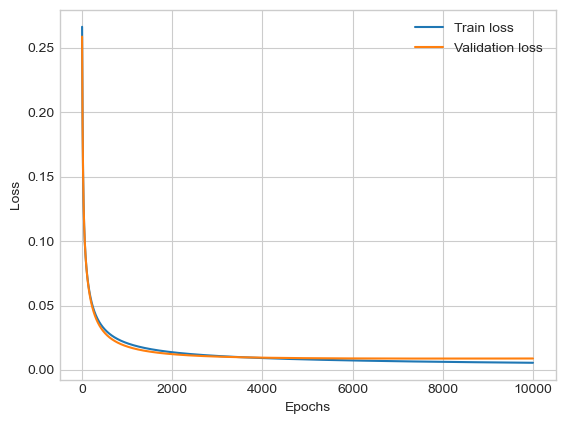

In [13]:
plt.plot(all_loss, label='Train loss')
plt.plot(all_loss_valid, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

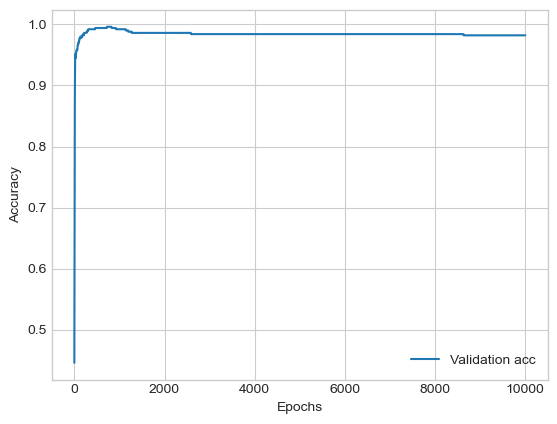

In [14]:
plt.plot(all_acc_valid, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
net = Net(2, 16, 1)

lr = 1e-1
epochs = 2_000
loss = MSELoss()

all_loss, all_loss_valid, all_acc_valid, best_parameters = SGD(
    net,
    loss,
    lr,
    X,
    y,
    epochs,
    GradientDescentMode.BATCH,
    -1,
    eval_fn,
    X_test,
    y_test,
)

Train : -----------------------------------
Epoch 200: train loss: 0.04483431175979175 val loss: 0.04343239278359708 val eval_fn: 0.994
Epoch 400: train loss: 0.03103789359098859 val loss: 0.02870324788746955 val eval_fn: 0.996
Epoch 600: train loss: 0.025046261964567728 val loss: 0.022527754229184353 val eval_fn: 0.994
Epoch 800: train loss: 0.02152201137843236 val loss: 0.019035902361159502 val eval_fn: 0.994
Epoch 1000: train loss: 0.01912871512833518 val loss: 0.016761509279499945 val eval_fn: 0.99
Epoch 1200: train loss: 0.017364179462349028 val loss: 0.015156104988539539 val eval_fn: 0.988
Epoch 1400: train loss: 0.015992747020017795 val loss: 0.013963463737958622 val eval_fn: 0.984
Epoch 1600: train loss: 0.014887063345709448 val loss: 0.01304575929226368 val eval_fn: 0.984
Epoch 1800: train loss: 0.013971285795009062 val loss: 0.012321319777384765 val eval_fn: 0.984
Epoch 2000: train loss: 0.013196943391606169 val loss: 0.01173824075178988 val eval_fn: 0.984
-------------------

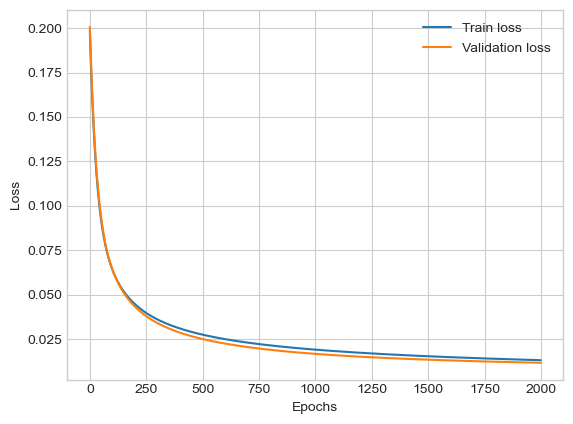

In [16]:
plt.plot(all_loss, label='Train loss')
plt.plot(all_loss_valid, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

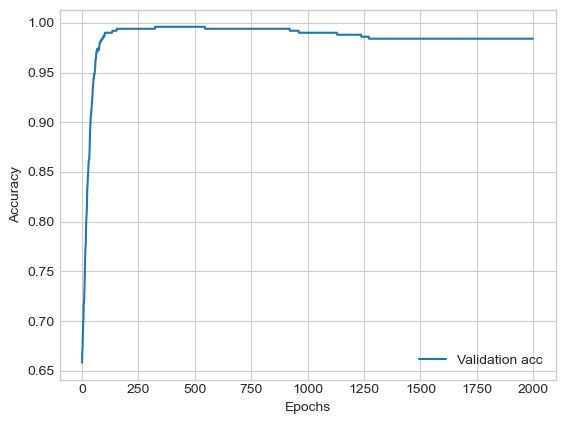

In [17]:
plt.plot(all_acc_valid, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
net = Net(2, 16, 1)

lr = 1e-1
epochs = 200
loss = MSELoss()

all_loss, all_loss_valid, all_acc_valid, best_parameters = SGD(
    net,
    loss,
    lr,
    X,
    y,
    epochs,
    GradientDescentMode.BATCH,
    -1,
    eval_fn,
    X_test,
    y_test,
)

Train : -----------------------------------
Epoch 20: train loss: 0.1882468458209325 val loss: 0.1848547102903488 val eval_fn: 0.86
Epoch 40: train loss: 0.13155497333769217 val loss: 0.1315663624741556 val eval_fn: 0.922
Epoch 60: train loss: 0.10544999107928467 val loss: 0.10616194445263138 val eval_fn: 0.952
Epoch 80: train loss: 0.09014704933833238 val loss: 0.09086170017101375 val eval_fn: 0.966
Epoch 100: train loss: 0.07984134787949598 val loss: 0.08034285297727822 val eval_fn: 0.974
Epoch 120: train loss: 0.0722817958783937 val loss: 0.07250289098531075 val eval_fn: 0.976
Epoch 140: train loss: 0.06641659852002012 val loss: 0.06634509091484854 val eval_fn: 0.978
Epoch 160: train loss: 0.061686333289600215 val loss: 0.061332353536784526 val eval_fn: 0.984
Epoch 180: train loss: 0.05776342090976915 val loss: 0.057146115343533525 val eval_fn: 0.986
Epoch 200: train loss: 0.054441255559265433 val loss: 0.0535828733154539 val eval_fn: 0.988
------------------------------------------

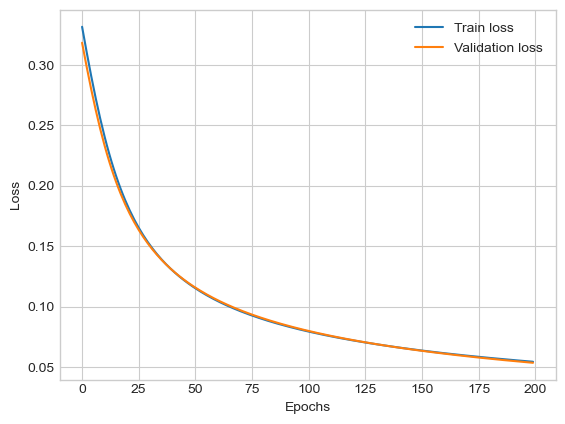

In [19]:
plt.plot(all_loss, label='Train loss')
plt.plot(all_loss_valid, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

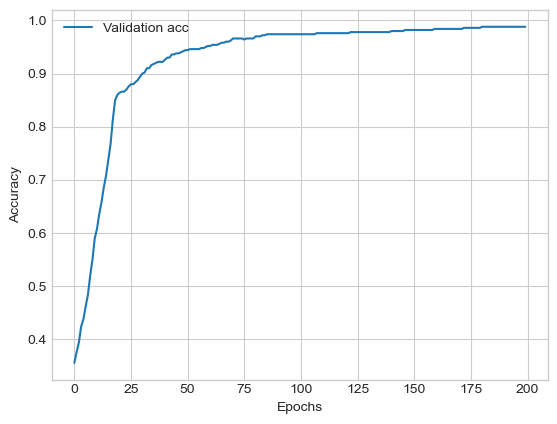

In [20]:
plt.plot(all_acc_valid, label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()